# Build a predictive maintenance model for a delivery company - @ahmetsalimcetin


## In this project we have an unbalanced dataset of device failures. Before training the algorythm we have to deal with that unbalance so that it works proparly

In [1]:
# import necessary libraries
import pandas as pd
import datetime as dt
import pandas_profiling

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('failure.csv')

In [3]:
df.describe(include='all')

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494,124494,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
unique,304,1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-03,Z1F0GB8A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1163,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,NaN,NaN,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000


In [4]:
df.isnull().sum()
# okay we have no null data

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [5]:
# we create appopriate time data columns
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [6]:
df.sample(5)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
66280,2015-04-04,Z1F148T1,0,129796800,0,0,0,8,198466,0,0,0,4,4,2015
52198,2015-03-12,S1F135CE,0,190234096,0,0,0,11,421002,0,0,0,12,3,2015
61544,2015-03-26,W1F0F65G,0,27017880,0,0,0,10,283474,0,0,1,26,3,2015
57582,2015-03-20,S1F121LH,0,124821312,0,0,0,9,214190,0,0,0,20,3,2015
58394,2015-03-21,W1F0SWST,0,37483288,0,0,0,13,246640,0,0,0,21,3,2015


In [7]:
df=df.drop('date',axis=1)

In [8]:
df.shape

(124494, 14)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape # it seems that there is no duplicated data.

(124494, 14)

In [11]:
df.corr()['failure'].sort_values(ascending=False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6   -0.000550
attribute3   -0.000948
year               NaN
Name: failure, dtype: float64

In [12]:
df['device'].nunique()

1168

In [13]:
df['failure'].nunique()

2

In [14]:
# we group the model names
df['device']=[i[:4] for i in df.device.values.tolist()]

In [15]:
df['device'].nunique()

7

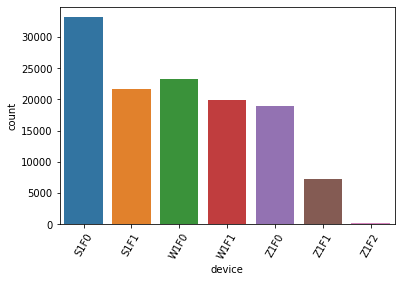

In [16]:
sns.countplot(df['device'])
plt.xticks(rotation = 60);

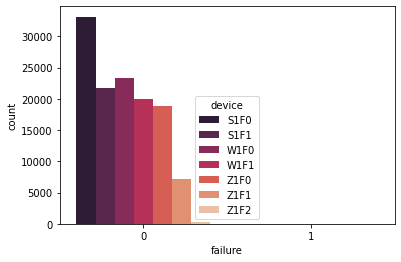

In [17]:
sns.countplot(x= 'failure', data =  df, hue = 'device',palette ="rocket");

In [18]:
df['attribute8'].sort_values(ascending=False)


75904     832
76263     832
21786     744
121316    736
121016    736
         ... 
82618       0
82619       0
82620       0
82621       0
0           0
Name: attribute8, Length: 124494, dtype: int64

<AxesSubplot:xlabel='attribute1'>

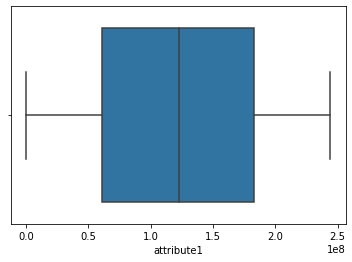

In [19]:
sns.boxplot('attribute1', data=df)

<AxesSubplot:xlabel='attribute2'>

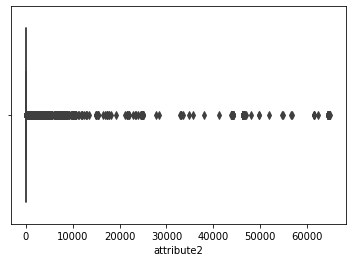

In [20]:
sns.boxplot('attribute2', data=df)

In [21]:
df['failure'].value_counts()
# this output showa us that the dataset is imbalanced, we can not make machine learning with this, even if we did it would'nt be succesful.

0    124388
1       106
Name: failure, dtype: int64

In [22]:
df_nonsuc= df[df['failure'] < 1]

In [23]:
df_suc= df[df['failure'] > 0]

In [24]:
df_suc.shape, df_nonsuc.shape

((106, 14), (124388, 14))

In [25]:
df_nonsuc.head(10)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
0,S1F0,0,215630672,56,0,52,6,407438,0,0,7,1,1,2015
1,S1F0,0,61370680,0,3,0,6,403174,0,0,0,1,1,2015
2,S1F0,0,173295968,0,0,0,12,237394,0,0,0,1,1,2015
3,S1F0,0,79694024,0,0,0,6,410186,0,0,0,1,1,2015
4,S1F0,0,135970480,0,0,0,15,313173,0,0,3,1,1,2015
5,S1F0,0,68837488,0,0,41,6,413535,0,0,1,1,1,2015
6,S1F0,0,227721632,0,0,0,8,402525,0,0,0,1,1,2015
7,S1F0,0,141503600,0,0,1,19,494462,16,16,3,1,1,2015
8,S1F0,0,8217840,0,1,0,14,311869,0,0,0,1,1,2015
9,S1F0,0,116440096,0,323,9,9,407905,0,0,164,1,1,2015


In [26]:
df_nonsuc = df_nonsuc.sample(frac=1).reset_index(drop=True)


In [27]:
df_nonsuc.head(10)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
0,W1F1,0,204775328,0,0,0,8,427201,0,0,0,31,1,2015
1,W1F1,0,166100864,0,0,0,9,246989,0,0,0,9,8,2015
2,W1F0,0,150558440,0,1,6,13,267176,0,0,1,12,6,2015
3,W1F0,0,230752288,0,0,0,10,239402,0,0,0,28,3,2015
4,S1F1,0,213212200,0,0,0,7,199996,0,0,0,4,1,2015
5,Z1F1,0,239002216,0,0,0,8,257186,0,0,0,28,6,2015
6,W1F1,0,93908920,0,0,0,16,367526,0,0,0,20,7,2015
7,W1F1,0,146534760,0,0,0,9,223204,0,0,0,29,3,2015
8,S1F0,0,163701848,0,0,0,13,280876,0,0,0,28,7,2015
9,S1F0,0,79209880,0,0,0,58,245326,0,0,0,15,4,2015


In [28]:
df_nonsuccess=df_nonsuc[:500]

In [29]:
df_new=df_nonsuccess.append(df_suc)

In [30]:
df_new.shape

(606, 14)

In [31]:
df_new.sample(5)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
173,W1F1,0,152737200,0,0,0,10,31,0,0,0,2,7,2015
273,S1F0,0,72849704,0,0,0,6,286164,0,0,0,17,5,2015
79367,Z1F1,1,68239312,0,0,95,8,192558,16,16,0,8,5,2015
107,S1F0,0,31784160,0,0,0,58,248091,0,0,0,2,5,2015
360,S1F0,0,79713848,0,0,0,7,25,0,0,0,10,3,2015


In [32]:
df_new['failure'].value_counts()


0    500
1    106
Name: failure, dtype: int64

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 124329
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   device      606 non-null    object
 1   failure     606 non-null    int64 
 2   attribute1  606 non-null    int64 
 3   attribute2  606 non-null    int64 
 4   attribute3  606 non-null    int64 
 5   attribute4  606 non-null    int64 
 6   attribute5  606 non-null    int64 
 7   attribute6  606 non-null    int64 
 8   attribute7  606 non-null    int64 
 9   attribute8  606 non-null    int64 
 10  attribute9  606 non-null    int64 
 11  day         606 non-null    int64 
 12  month       606 non-null    int64 
 13  year        606 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 71.0+ KB


In [34]:
x=df_new.drop('failure',axis=1)
y=df_new['failure']

In [35]:
x=pd.get_dummies(x,drop_first=True)

In [36]:
#Classification
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [37]:
def classification_(x,y):
    
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
            
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('AccuracyScore',ascending=False)

In [38]:
classification_(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
Bernoulli,0.926230,0.941176,0.666667,0.780488
RandomForest,0.901639,0.800000,0.666667,0.727273
AdaBoost,0.901639,0.800000,0.666667,0.727273
GradientBoosting,0.893443,0.789474,0.625000,0.697674
Multinominal,0.860656,0.818182,0.375000,0.514286
Gaussian,0.827869,1.000000,0.125000,0.222222
LogisticRegr,0.827869,1.000000,0.125000,0.222222
DecisionTree,0.811475,0.517241,0.625000,0.566038
SVC,0.803279,0.000000,0.000000,0.000000
KNeigbors,0.786885,0.250000,0.041667,0.071429
